225
[[ 0.40401571]
 [ 2.38377039]
 [-0.171215  ]]


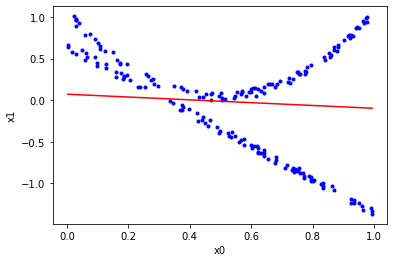

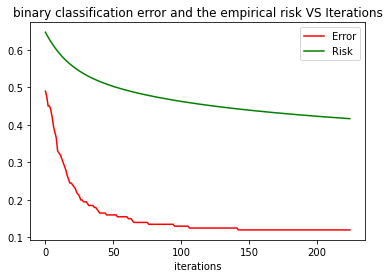

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 
from numpy import exp, log, absolute
from numpy.linalg import norm

def sigmoid(X):
    return 1.0/ (1+exp(-X))

def cal_risk(y, y_pred, N):
    risk = 0
    for i in range(y.shape[0]):
        if y[i,0] == 1:
            risk -= log(y_pred[i,0]) # (1-y_i = 0 since y_i=1)
        else:
            risk -= log(1-y_pred[i,0]) # (y_i = 0)
    return risk/N  #Risk is average over loss

def cal_error(y, y_pred, N):
    return float(np.count_nonzero((y_pred>0.5)!=y))/N # calculates unmatched predictions

def LogisticReg(x, y, opts):
    samples_num, features_num = x.shape
    lr  = opts['lr']
    tol = opts['tolerance']
    weights = np.random.random_sample((features_num, 1))
    error_list = []
    risk_list  = []
    iterations = 0

    while True:
        output  = sigmoid(x.dot(weights))
        error   = y - output
        error_list.append(cal_error(y, output, samples_num))
        risk_list.append(cal_risk(y, output, samples_num))
        dec     = lr * 1/samples_num * x.T.dot(error)
        weights = weights + dec
        iterations  += 1
        if norm(dec)<tol:  #break the loop if the error is below tolerance
            break
    
    return weights, iterations, error_list, risk_list

def show_boundary(weights, x, y):
    plt.figure(0)
    samples_num = x.shape[0]
    for i in range(samples_num):
        plt.plot(x[i, 0], x[i, 1], 'b.')
    min_x = min(x[:, 0])
    max_x = max(x[:, 0])
    y_min_x = float(-weights[2] - weights[0] * min_x) / weights[1]
    y_max_x = float(-weights[2] - weights[0] * max_x) / weights[1]
    plt.plot([min_x, max_x], [y_min_x, y_max_x], '-r')
    plt.xlabel('x0'); plt.ylabel('x1')
    plt.show()

def show_err_risk(iters, error_list, risk_list):
    plt.figure(1)
    plt.plot(range(iters), error_list,'r-',label='Error')
    plt.plot(range(iters), risk_list, 'g-',label='Risk')
    plt.xlabel('iterations')
    plt.title('binary classification error and the empirical risk VS Iterations')
    plt.legend()
    plt.show()

    
matdata = loadmat('dataset4.mat')
x = matdata['X']
y = matdata['Y']

opts = {'lr':0.1, 'tolerance':0.005} 
weights, iterations, error_list, risk_list= LogisticReg(x, y, opts)
print(iterations)
print(weights)
show_boundary(weights, x, y)
show_err_risk(iterations, error_list, risk_list)

5937
[[20.82526812]
 [12.92808004]
 [-8.80488496]]


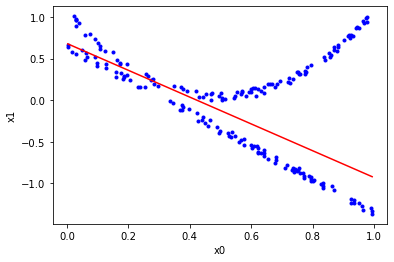

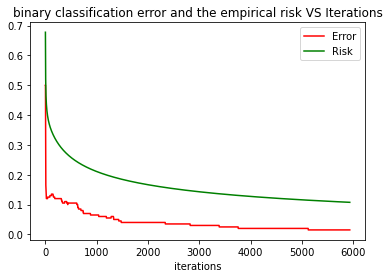

In [20]:
opts = {'lr':0.5, 'tolerance':0.002} 
weights, iterations, error_list, risk_list= LogisticReg(x, y, opts)
print(iterations)
print(weights)
show_boundary(weights, x, y)
show_err_risk(iterations, error_list, risk_list)

4376
[[23.79647329]
 [14.41844803]
 [-9.93745406]]


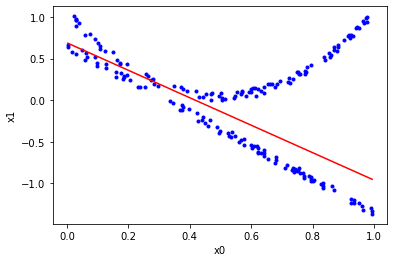

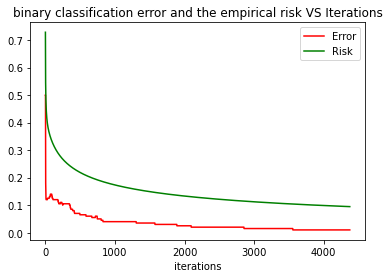

In [21]:
opts = {'lr':0.9, 'tolerance':0.003} 
weights, iterations, error_list, risk_list= LogisticReg(x, y, opts)
print(iterations)
print(weights)
show_boundary(weights, x, y)
show_err_risk(iterations, error_list, risk_list)